In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs



In [20]:
sns.set(style="whitegrid")

In [21]:
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

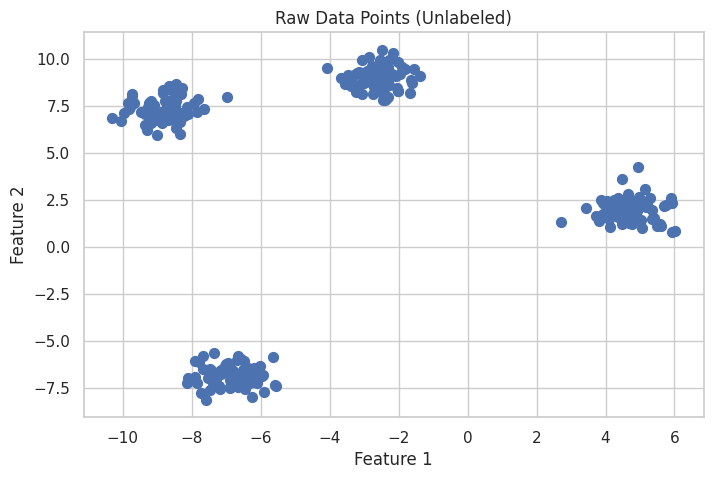

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Raw Data Points (Unlabeled)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

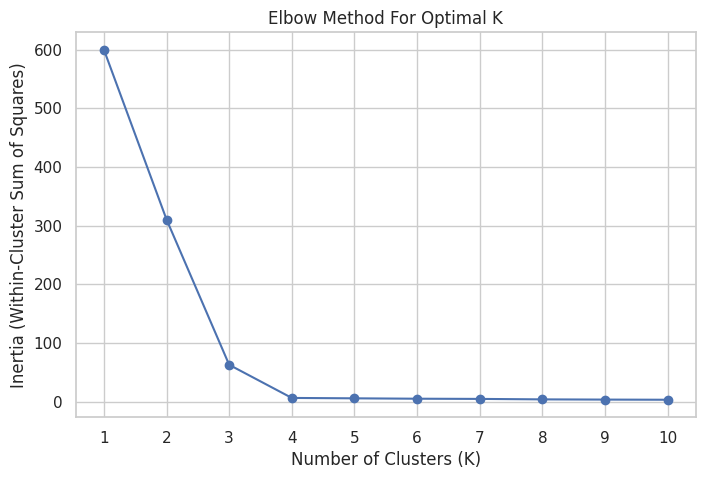

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(K_range)
plt.show()

In [26]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

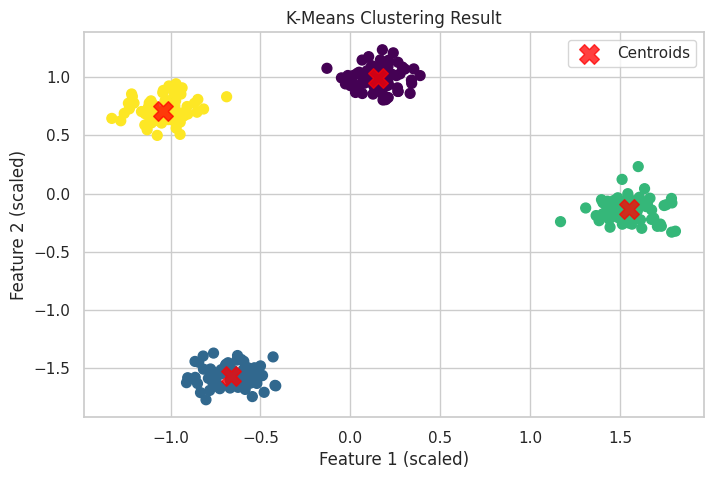

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.show()


In [28]:
print("Cluster Centers (in scaled space):")
print(centers)


Cluster Centers (in scaled space):
[[ 0.15256919  0.99257342]
 [-0.66142128 -1.56752677]
 [ 1.55047856 -0.13507979]
 [-1.04162647  0.71003314]]


In [29]:
print("\nFirst 10 Predicted Cluster Labels:")
print(y_kmeans[:10])


First 10 Predicted Cluster Labels:
[3 3 0 1 3 1 2 1 0 2]
